### Intro

Deze file is bedoelt om een inzicht te krijgen over de tweets_fng.csv file. 

### Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings

warnings.filterwarnings('ignore')

### Read data

Hieronder kun je de eerste vijf rijen van de dataset bekijken. Er is een kolom dat real_fake_grade heet. Dit is onze label. Het bestaat uit unieke waardes tussen -1.0 en 1.0.

In [3]:
data = pd.read_csv('../cleaned_dataset.csv')

data.head()

,Unnamed: 0,full_text,retweet_count,favorite_count,user_description,user_followers_count,user_normal_followers_count,user_friends_count,user_listed_count,user_created_at,...,user_creation_tweet_diff,tweeted_in_daypart_day,tweeted_in_daypart_evening,tweeted_in_daypart_morning,tweeted_in_daypart_night,user_created_in_daypart_day,user_created_in_daypart_evening,user_created_in_daypart_morning,user_created_in_daypart_night,real_fake_grade
0,0,Our daily update is published. States reported...,171,528,We try to provide the most comprehensive state...,468030,468030,13,6034,Sun Mar 08 07:40:57 +0000 2020,...,16384932,0,1,0,0,0,0,1,0,1.0
1,1,President Trump Asked What He Would Do If He W...,0,0,"Spoof news, political satire, parody and more!...",803,803,97,118,Thu Jan 13 11:50:15 +0000 2011,...,293776787,1,0,0,0,0,0,1,0,-1.0
2,2,States reported 630 deaths. We are still seein...,71,199,We try to provide the most comprehensive state...,468030,468030,13,6034,Sun Mar 08 07:40:57 +0000 2020,...,9039963,0,1,0,0,0,0,1,0,1.0
3,3,Low #vitaminD was an independent predictor of ...,40,71,Medscape provides breaking medical news and ex...,215969,215969,39457,2989,Tue Oct 21 19:26:01 +0000 2008,...,375950159,0,0,0,1,0,1,0,0,1.0
4,4,A common question: why are the cumulative outc...,0,29,We try to provide the most comprehensive state...,468030,468030,13,6034,Sun Mar 08 07:40:57 +0000 2020,...,2470004,0,1,0,0,0,0,1,0,1.0


### Data analyse

In [4]:
data.shape
print(f"Dataset bestaat uit {data.shape[0]} rijen en {data.shape[1]} kolommen")

Dataset bestaat uit 7905 rijen en 55 kolommen


In [5]:
print(f"Er zijn {len(data._get_numeric_data().columns)} numerical kolommen in de dataset")
print(f"Er zijn {len(data.select_dtypes('object').columns)} categorical kolommen in de dataset")

Er zijn 51 numerical kolommen in de dataset
Er zijn 4 categorical kolommen in de dataset


In [6]:
data.describe(exclude='object')

,Unnamed: 0,retweet_count,favorite_count,user_followers_count,user_normal_followers_count,user_friends_count,user_listed_count,user_favourites_count,user_statuses_count,user_media_count,...,user_creation_tweet_diff,tweeted_in_daypart_day,tweeted_in_daypart_evening,tweeted_in_daypart_morning,tweeted_in_daypart_night,user_created_in_daypart_day,user_created_in_daypart_evening,user_created_in_daypart_morning,user_created_in_daypart_night,real_fake_grade
count,7905.000000,7905.000000,7905.000000,7.905000e+03,7.905000e+03,7905.000000,7905.000000,7.905000e+03,7.905000e+03,7.905000e+03,...,7.905000e+03,7905.000000,7905.000000,7905.000000,7905.00000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3953.688299,35.918786,86.444782,5.739595e+05,5.739595e+05,2519.952435,2835.398608,1.586713e+04,5.503558e+04,1.238843e+04,...,2.039026e+08,0.340797,0.301961,0.198102,0.15914,0.241493,0.287666,0.268438,0.202404,0.289564
std,2282.539615,259.559726,921.679424,2.263164e+06,2.263164e+06,8964.772729,8180.748877,4.661717e+04,1.400234e+05,6.356743e+04,...,1.403173e+08,0.474007,0.459137,0.398595,0.36583,0.428015,0.452703,0.443175,0.401817,0.895204
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000e+00,...,4.290000e+02,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,1977.000000,0.000000,0.000000,4.300000e+02,4.300000e+02,72.000000,3.000000,1.280000e+02,3.435000e+03,3.120000e+02,...,5.002960e+07,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,3954.000000,0.000000,2.000000,3.324000e+03,3.324000e+03,316.000000,70.000000,1.778000e+03,1.790000e+04,1.364000e+03,...,2.308938e+08,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5930.000000,10.000000,26.000000,1.267820e+05,1.267820e+05,1381.000000,949.000000,9.585000e+03,4.989200e+04,8.076000e+03,...,3.244285e+08,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,1.000000
max,7906.000000,10277.000000,50873.000000,6.113988e+07,6.113988e+07,319160.000000,187947.000000,1.324171e+06,3.657936e+06,2.385090e+06,...,4.479578e+08,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.describe(include = 'object')

,full_text,user_description,user_created_at,username
count,7905,7472,7905,7905
unique,7816,3587,3938,3903
top,"The UK faces a ""tipping point"" where ""more res...",We try to provide the most comprehensive state...,Sun Mar 08 07:40:57 +0000 2020,The COVID Tracking Project
freq,3,595,595,595


Het stukje code hieronder geeft aan hoeveel lege velden er zijn in elke kolom. Zoals je kunt zien, zijn er heel wat lege velden.

In [8]:
data.isna().sum()

Unnamed: 0                           0
full_text                            0
retweet_count                        0
favorite_count                       0
user_description                   433
user_followers_count                 0
user_normal_followers_count          0
user_friends_count                   0
user_listed_count                    0
user_created_at                      0
user_favourites_count                0
user_statuses_count                  0
user_media_count                     0
user_translator_type                 0
hashtags_count                       0
username                             0
user_profile_location                0
has_user_url                         0
text_length                          0
sent_via_twitter                     0
twitter_android_user                 0
twitter_apple_user                   0
tweeted_in_weekend                   0
user_created_in_weekend              0
possibly_sensitive_media             0
user_is_verified         

Er zijn geen gedupliceerde waarden.

In [9]:
data.duplicated().sum()

0

In [10]:
data['real_fake_grade'].value_counts()

 1.0    4643
-1.0    2354
 0.0     908
Name: real_fake_grade, dtype: int64

In [11]:
real = data[data['real_fake_grade'] == 1]['real_fake_grade'].count()
real

4643

In [12]:
neutral = data[data['real_fake_grade'] == 0]['real_fake_grade'].count()
neutral

908

In [13]:
fake = data[data['real_fake_grade']  == -1]['real_fake_grade'].count()
fake

2354

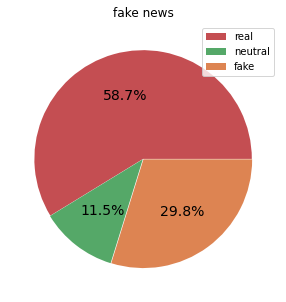

In [14]:
#define Seaborn color palette to use
colors = sns.color_palette('deep')[3 :  : -1]

plt.figure(figsize=(5,5))
plt.pie([real, neutral, fake], colors=colors, autopct='%.1F%%', textprops = {'fontsize':14}, explode = [0, 0.005, 0.005])
plt.legend(labels=['real','neutral','fake'])
plt.title('fake news')
plt.show()

**Insights**

De dataset is niet echt in balans

In [15]:
is_fake_condition = data['real_fake_grade'] <= 0
is_real_condition = data['real_fake_grade'] > 0

real_data = data[is_real_condition]
fake_data = data[is_fake_condition]

verified_tweets = data[data['user_is_verified'] == 1]
non_verified_tweets = data[data['user_is_verified'] == 0]

# print(f'Verified tweets: {len(verified_tweets)}\nNon verified tweets: {len(non_verified_tweets)}')

### Binary

In [16]:
data['real_fake_grade']

0       1.0
1      -1.0
2       1.0
3       1.0
4       1.0
       ... 
7900    1.0
7901   -1.0
7902    1.0
7903    0.0
7904    1.0
Name: real_fake_grade, Length: 7905, dtype: float64

In [17]:
import math

txt_size = 16
#colors = sns.color_palette('deep')[3 :  : -1]
colors_pie = ["#93ff59", "#ff5959", "#f4ff59", "#5990ff"]
colors_bar = ["#93ff59", "#5990ff", "#ff5959"]

def set_pie_basics(ax, title, values, labels):
  ax.set_title(title, size=txt_size)
  ax.pie(values, labels=labels, autopct='%.1F%%', colors=colors_pie, textprops = {'fontsize':14}, explode = [0.005 for _ in range(len(labels))])
  ax.legend()

def set_bar_basics(ax, title, values, labels):
  ax.set_title(title, size=txt_size)
  ax.bar(labels,values, color=colors_bar)
  ax.legend()

def query(dicts):
  frames = []
  for dict in dicts:
    query = ''
    i = 0
    items = dict.items()
    for key, value in items:
      equals = '=='

      if isinstance(value, str) and '=' in value:
        equals = ''

      query += f'{key} {equals} {value}'
    
      if i != len(items) - 1:
        query += ' & '

      i+=1
    
    frames.append(len(data.query(query)[['user_is_verified', 'real_fake_grade']]))
  return frames

def plot_pie_charts(title, charts, cols = 3):
  rows = math.ceil(len(charts) / cols)

  fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20,8 * rows))

  fig.suptitle(title, size=txt_size*1.5)
  fig.patch.set_facecolor('white')

  axes = axes.flatten()

  for ax, (title, condition_dicts, labels) in zip(axes, charts):

    frames = query(condition_dicts)

    set_pie_basics(ax, title, frames, labels)

  plt.show()

def plot_bar_charts(title, charts, cols = 3):
  rows = math.ceil(len(charts) / cols)

  fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20,8 * rows))

  fig.suptitle(title, size=txt_size*1.5)
  fig.patch.set_facecolor('white')

  axes = axes.flatten()

  for ax, (title, condition_dicts, labels) in zip(axes, charts):

    frames = query(condition_dicts)

    set_bar_basics(ax, title, frames, labels)

  plt.show()

## General distribution

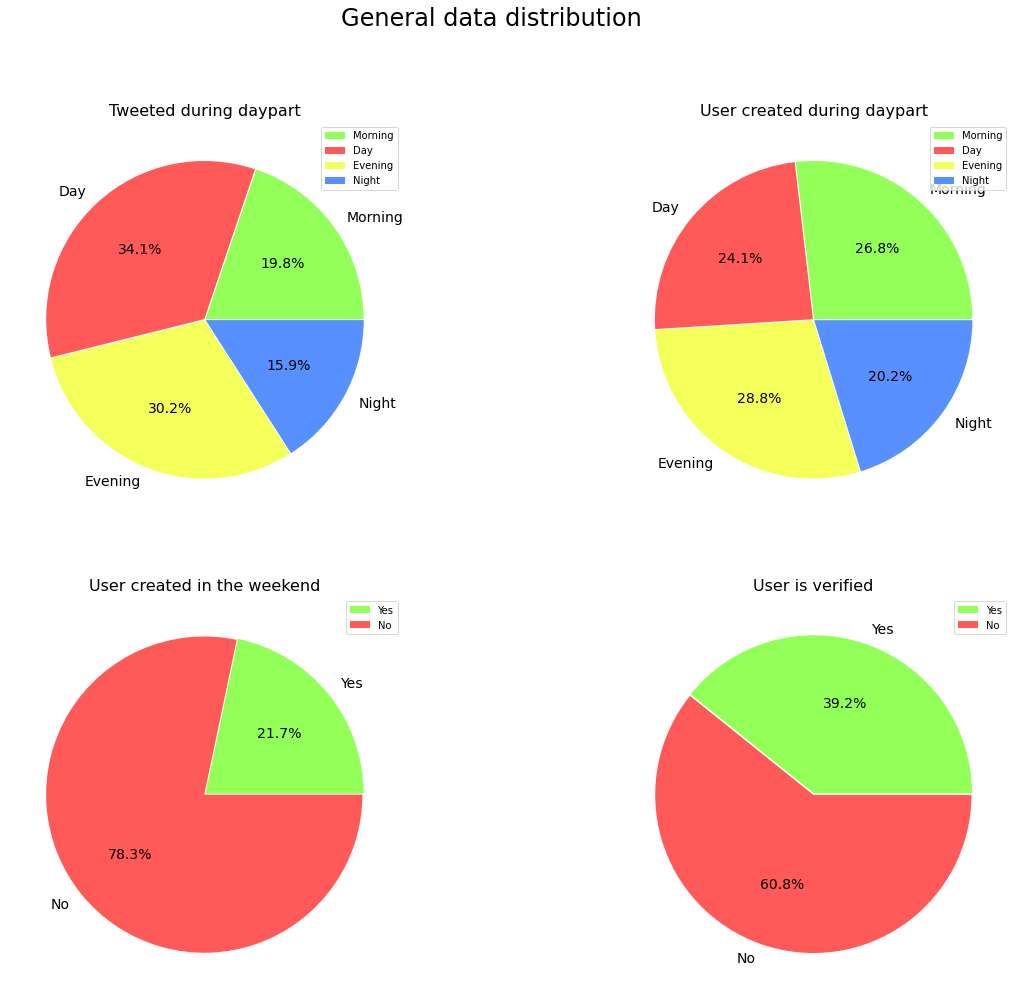

In [18]:
day_night_labels = ['Morning', 'Day', 'Evening', 'Night']
yes_no_labels = ['Yes', 'No']

plot_pie_charts(title= 'General data distribution', cols=2, charts=[
  ('Tweeted during daypart', [
    { 'tweeted_in_daypart_morning': 1 },
    { 'tweeted_in_daypart_day': 1 },
    { 'tweeted_in_daypart_evening': 1 },
    { 'tweeted_in_daypart_night': 1 }
  ], day_night_labels),
  ('User created during daypart', [
    { 'user_created_in_daypart_morning': 1 },
    { 'user_created_in_daypart_day': 1 },
    { 'user_created_in_daypart_evening': 1 },
    { 'user_created_in_daypart_night': 1 }
  ], day_night_labels),
  ('User created in the weekend', [
    { 'user_created_in_weekend': 1 },
    { 'user_created_in_weekend': 0 },
  ], yes_no_labels),
  ('User is verified', [
    { 'user_is_verified': 1 },
    { 'user_is_verified': 0 },
  ], yes_no_labels),
])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


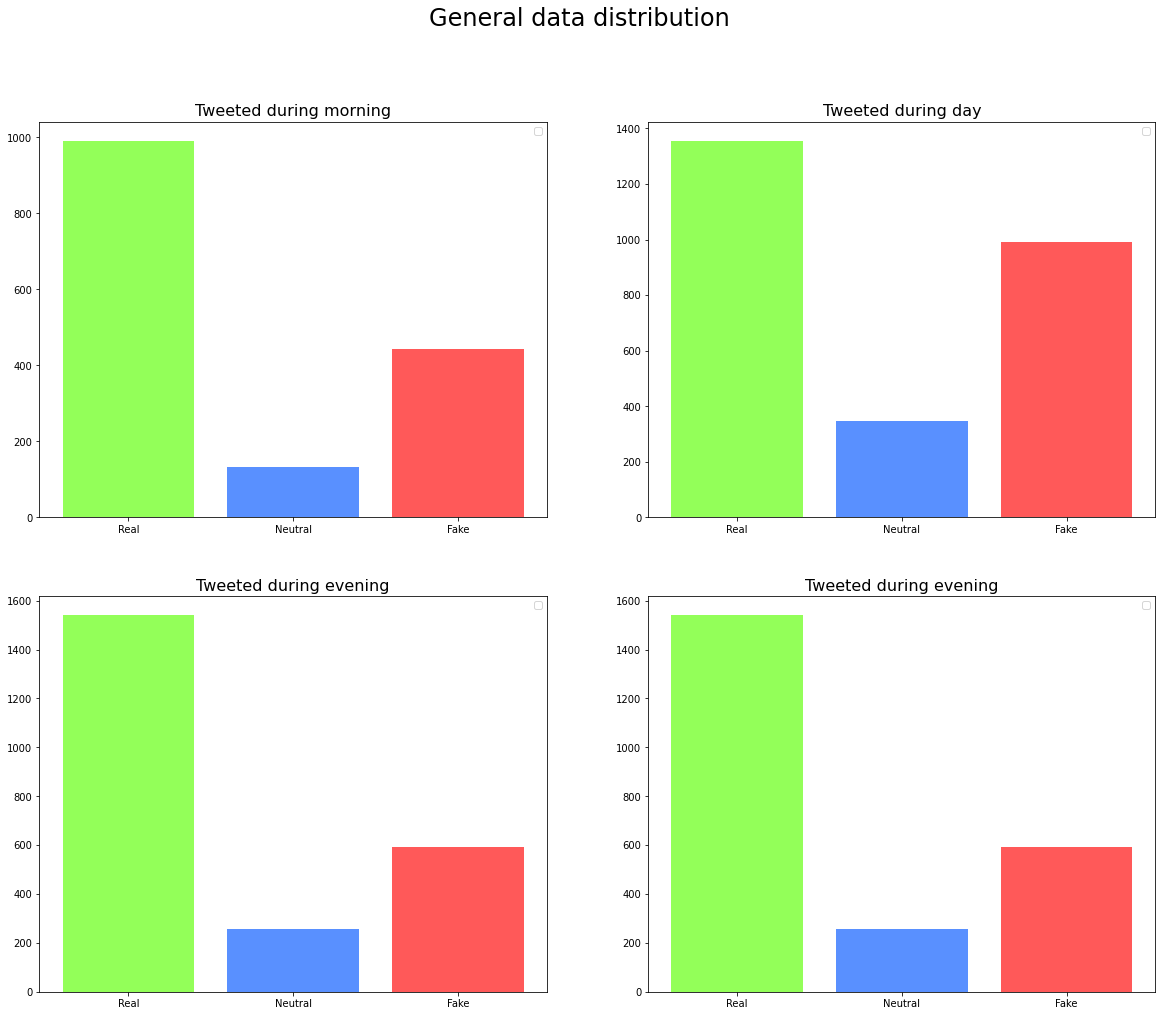

In [19]:
plot_bar_charts(title= 'General data distribution', cols=2, charts=[
  ('Tweeted during morning', [
    { 'tweeted_in_daypart_morning': 1, 'real_fake_grade': 1 },
    { 'tweeted_in_daypart_morning': 1, 'real_fake_grade': 0 },
    { 'tweeted_in_daypart_morning': 1, 'real_fake_grade': -1 },
  ], ['Real', 'Neutral', 'Fake']),
  ('Tweeted during day', [
    { 'tweeted_in_daypart_day': 1, 'real_fake_grade': 1 },
    { 'tweeted_in_daypart_day': 1, 'real_fake_grade': 0 },
    { 'tweeted_in_daypart_day': 1, 'real_fake_grade': -1 },
  ], ['Real', 'Neutral', 'Fake']),
  ('Tweeted during evening', [
    { 'tweeted_in_daypart_evening': 1, 'real_fake_grade': 1 },
    { 'tweeted_in_daypart_evening': 1, 'real_fake_grade': 0 },
    { 'tweeted_in_daypart_evening': 1, 'real_fake_grade': -1 },
  ], ['Real', 'Neutral', 'Fake']),
  ('Tweeted during evening', [
    { 'tweeted_in_daypart_evening': 1, 'real_fake_grade': 1 },
    { 'tweeted_in_daypart_evening': 1, 'real_fake_grade': 0 },
    { 'tweeted_in_daypart_evening': 1, 'real_fake_grade': -1 },
  ], ['Real', 'Neutral', 'Fake'])
])

## Fake/Real news distribution

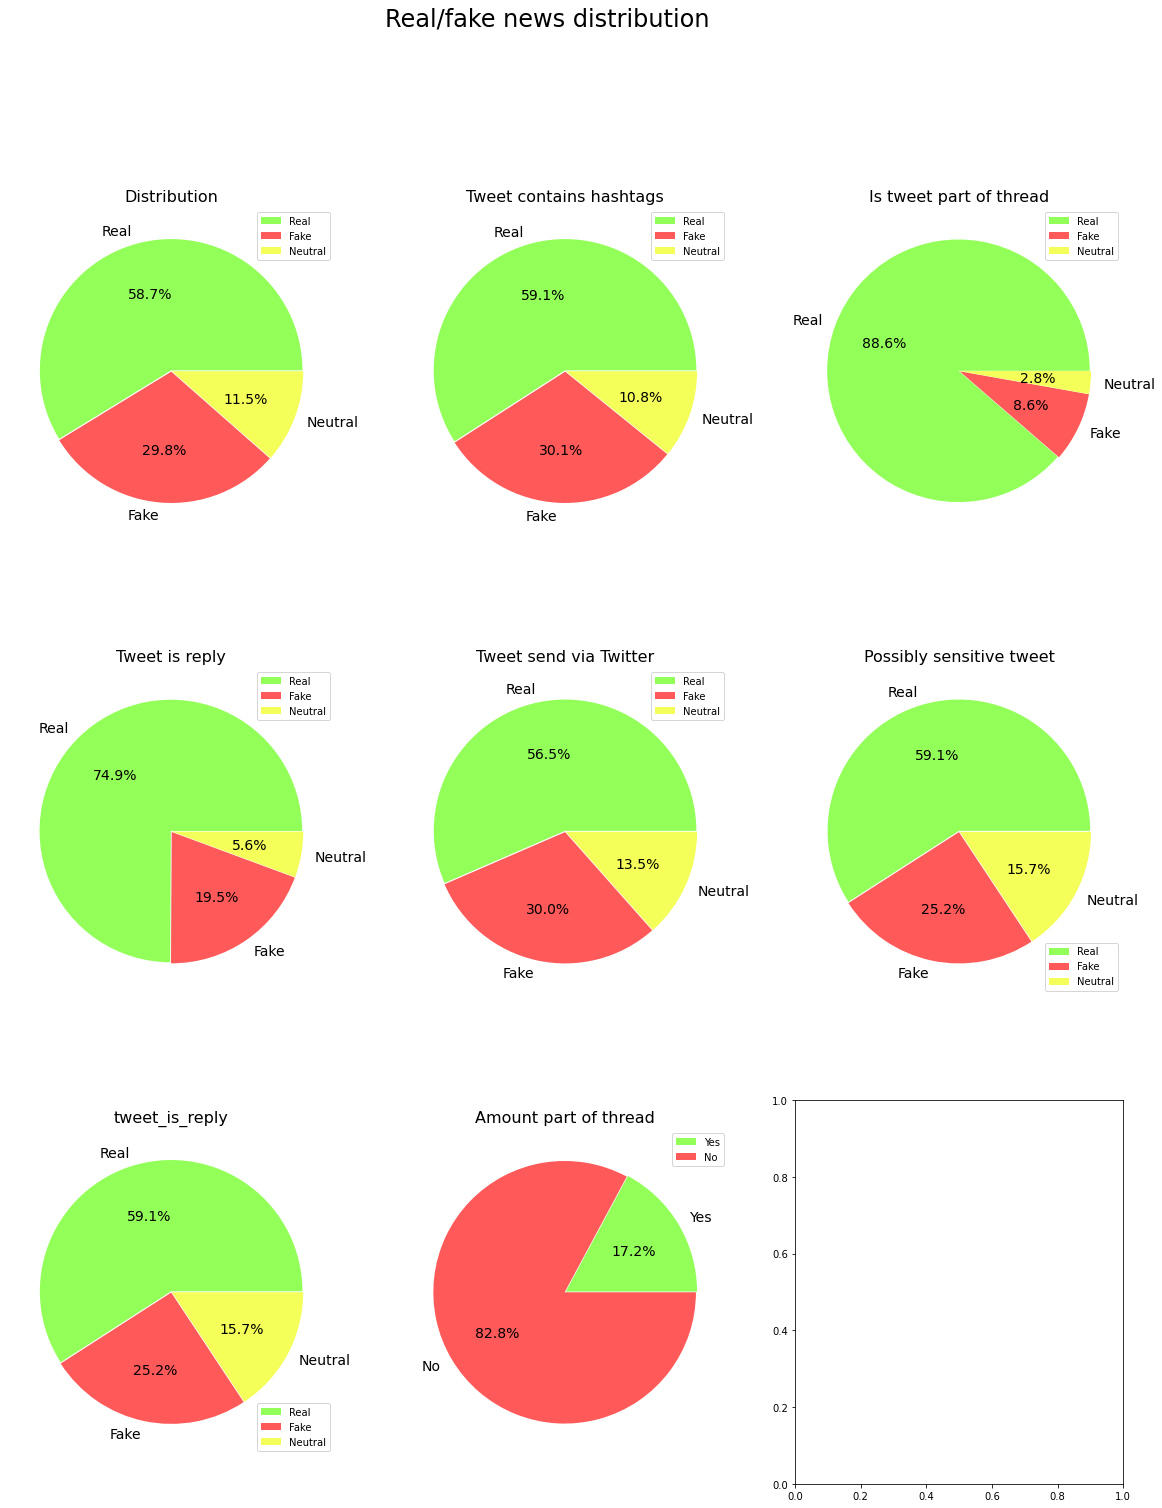

In [28]:
fake_real_labels = ['Real', 'Fake', 'Neutral']

plot_pie_charts(title='Real/fake news distribution', cols=3, charts= [
  ('Distribution', [
    { 'real_fake_grade': 1 },
    { 'real_fake_grade': -1 },
    { 'real_fake_grade': 0 }
  ], fake_real_labels),
  ('Tweet contains hashtags', [
    { 'hashtags_count': '>= 1', 'real_fake_grade': 1 },
    { 'hashtags_count': '>= 1', 'real_fake_grade': -1 },
    { 'hashtags_count': '>= 1', 'real_fake_grade': 0 }
  ], fake_real_labels),
  ('Is tweet part of thread', [
    { 'part_of_thread': 1, 'real_fake_grade': 1 },
    { 'part_of_thread': 1, 'real_fake_grade': -1 },
    { 'part_of_thread': 1, 'real_fake_grade': 0 }
  ], fake_real_labels),
  ('Tweet is reply', [
    { 'tweet_is_reply': 1, 'real_fake_grade': 1 },
    { 'tweet_is_reply': 1, 'real_fake_grade': -1 },
    { 'tweet_is_reply': 1, 'real_fake_grade': 0 }
  ], fake_real_labels),
  ('Tweet send via Twitter', [
    { 'sent_via_twitter': 1, 'real_fake_grade': 1 },
    { 'sent_via_twitter': 1, 'real_fake_grade': -1 },
    { 'sent_via_twitter': 1, 'real_fake_grade': 0 }
  ], fake_real_labels),
  ('Possibly sensitive tweet', [
    { 'possibly_sensitive_media': 1, 'real_fake_grade': 1 },
    { 'possibly_sensitive_media': 1, 'real_fake_grade': -1 },
    { 'possibly_sensitive_media': 1, 'real_fake_grade': 0 }
  ], fake_real_labels),
  ('tweet_is_reply', [
    { 'possibly_sensitive_media': 1, 'real_fake_grade': 1 },
    { 'possibly_sensitive_media': 1, 'real_fake_grade': -1 },
    { 'possibly_sensitive_media': 1, 'real_fake_grade': 0 }
  ], fake_real_labels),
  ('Amount part of thread', [
    { 'part_of_thread': 1 },
    { 'part_of_thread': 0 },
  ], yes_no_labels),
])

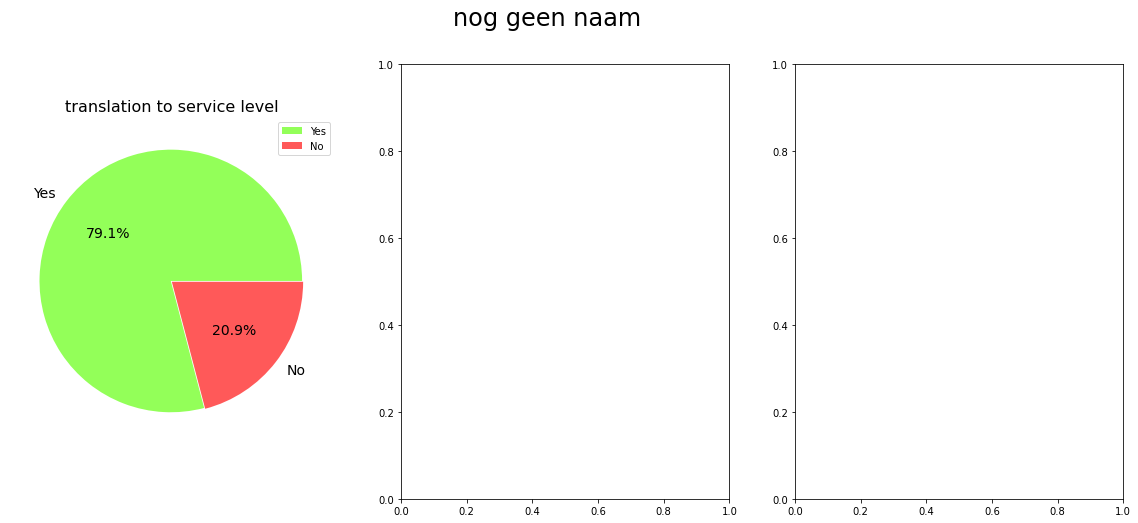

In [33]:
plot_pie_charts(title='nog geen naam', cols=3, charts= [
  ('translation to service level', [
    { 'user_has_translation_enabled': 1, 'user_service_level_mms': 1 },
    { 'user_has_translation_enabled': 1, 'user_service_level_mms': 0 },
  ], yes_no_labels)
])

### Type of user

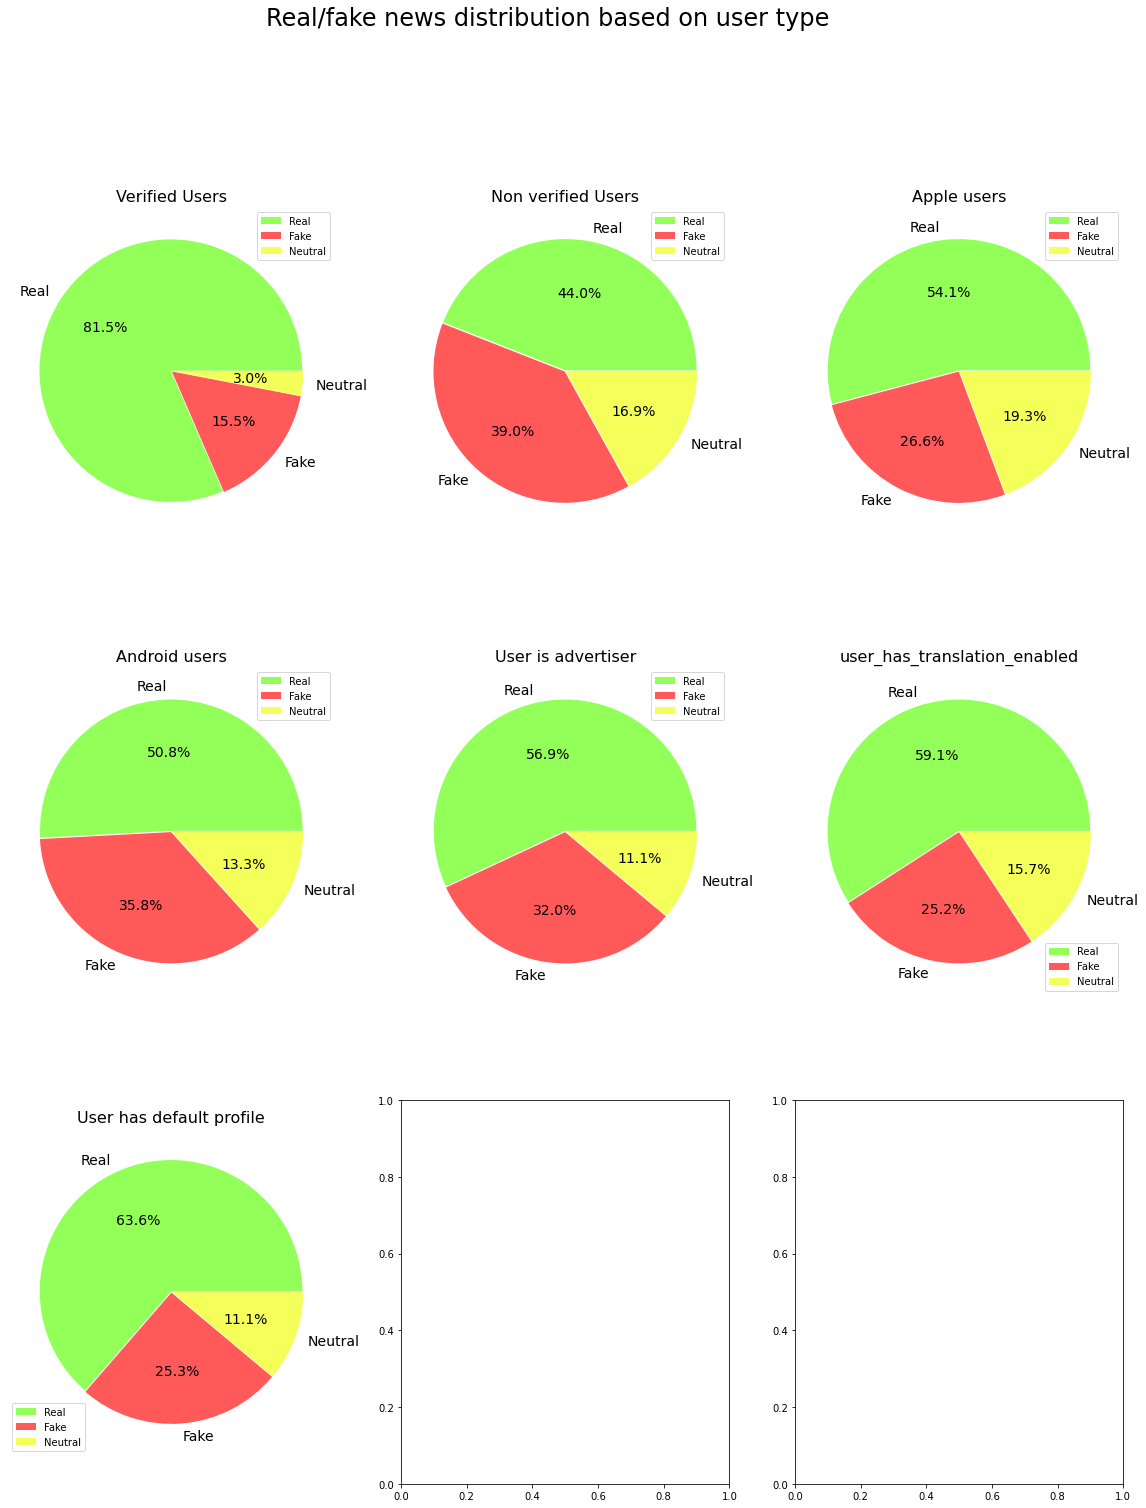

In [29]:
plot_pie_charts(title='Real/fake news distribution based on user type', cols=3, charts= [
  ('Verified Users', [
    { 'user_is_verified': 1, 'real_fake_grade': 1 },
    { 'user_is_verified': 1, 'real_fake_grade': -1 },
    { 'user_is_verified': 1, 'real_fake_grade': 0 }
  ], fake_real_labels),
  ('Non verified Users', [
    { 'user_is_verified': 0, 'real_fake_grade': 1 },
    { 'user_is_verified': 0, 'real_fake_grade': -1 },
    { 'user_is_verified': 0, 'real_fake_grade': 0 }
  ], fake_real_labels),
  ('Apple users', [
    { 'twitter_apple_user': 1, 'real_fake_grade': 1 },
    { 'twitter_apple_user': 1, 'real_fake_grade': -1 },
    { 'twitter_apple_user': 1, 'real_fake_grade': 0 }
  ], fake_real_labels),
  ('Android users', [
    { 'twitter_android_user': 1, 'real_fake_grade': 1 },
    { 'twitter_android_user': 1, 'real_fake_grade': -1 },
    { 'twitter_android_user': 1, 'real_fake_grade': 0 }
  ], fake_real_labels),
  ('User is advertiser', [
    { 'user_is_advertiser': 1, 'real_fake_grade': 1 },
    { 'user_is_advertiser': 1, 'real_fake_grade': -1 },
    { 'user_is_advertiser': 1, 'real_fake_grade': 0 }
  ], fake_real_labels),
  ('user_has_translation_enabled', [
    { 'possibly_sensitive_media': 1, 'real_fake_grade': 1 },
    { 'possibly_sensitive_media': 1, 'real_fake_grade': -1 },
    { 'possibly_sensitive_media': 1, 'real_fake_grade': 0 }
  ], fake_real_labels),
  ('User has default profile', [
    { 'user_has_default_profile': 1, 'real_fake_grade': 1 },
    { 'user_has_default_profile': 1, 'real_fake_grade': -1 },
    { 'user_has_default_profile': 1, 'real_fake_grade': 0 }
  ], fake_real_labels)
])

### Timestamps

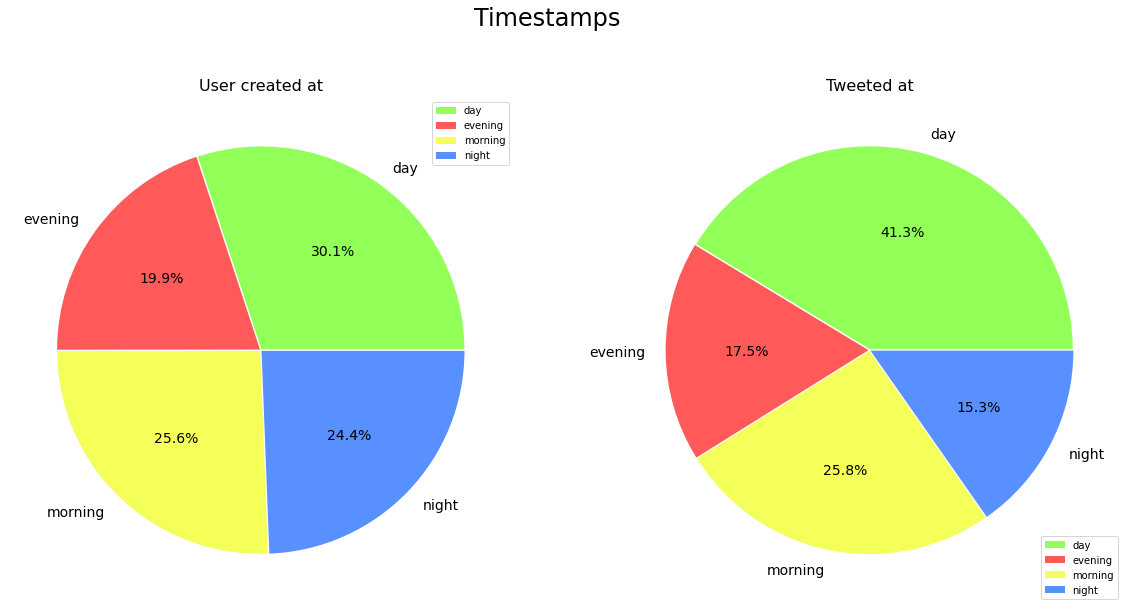

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
fig.suptitle('Timestamps', size=txt_size*1.5)
fig.patch.set_facecolor('white')

[user_created_at_ax, tweeted_at_ax] = axes.flatten()

# Created at
created_day = len(real_data[data['user_created_in_daypart_day'] == 1])
created_evening = len(fake_data[data['user_created_in_daypart_evening'] == 1])
created_morning = len(fake_data[data['user_created_in_daypart_morning'] == 1])
creadted_night = len(fake_data[data['user_created_in_daypart_night'] == 1])


labels=['day','evening','morning', 'night']

set_pie_basics(user_created_at_ax, 'User created at', [created_day, creadted_night, created_evening, created_morning], labels)

# Tweeted at
tweeted_day = len(real_data[data['tweeted_in_daypart_day'] == 1])
tweeted_evening = len(fake_data[data['tweeted_in_daypart_evening'] == 1])
tweeted_morning = len(fake_data[data['tweeted_in_daypart_morning'] == 1])
tweeted_night = len(fake_data[data['tweeted_in_daypart_night'] == 1])

labels=['day','evening','morning', 'night']

set_pie_basics(tweeted_at_ax, 'Tweeted at', [tweeted_day, tweeted_morning, tweeted_evening, tweeted_night], labels)


In [23]:
x = data['favorite_count']
y = data['real_fake_grade']

In [24]:
import math

data_columns = ['retweet_count', 'favorite_count', 'user_followers_count', 'user_normal_followers_count', 'user_friends_count', 'user_listed_count', 'user_statuses_count', 'user_media_count', 'hashtags_count', 'user_favourites_count', 'text_length', 'user_creation_tweet_diff']
columns = 4
rows = math.ceil(len(data_columns) / 4)

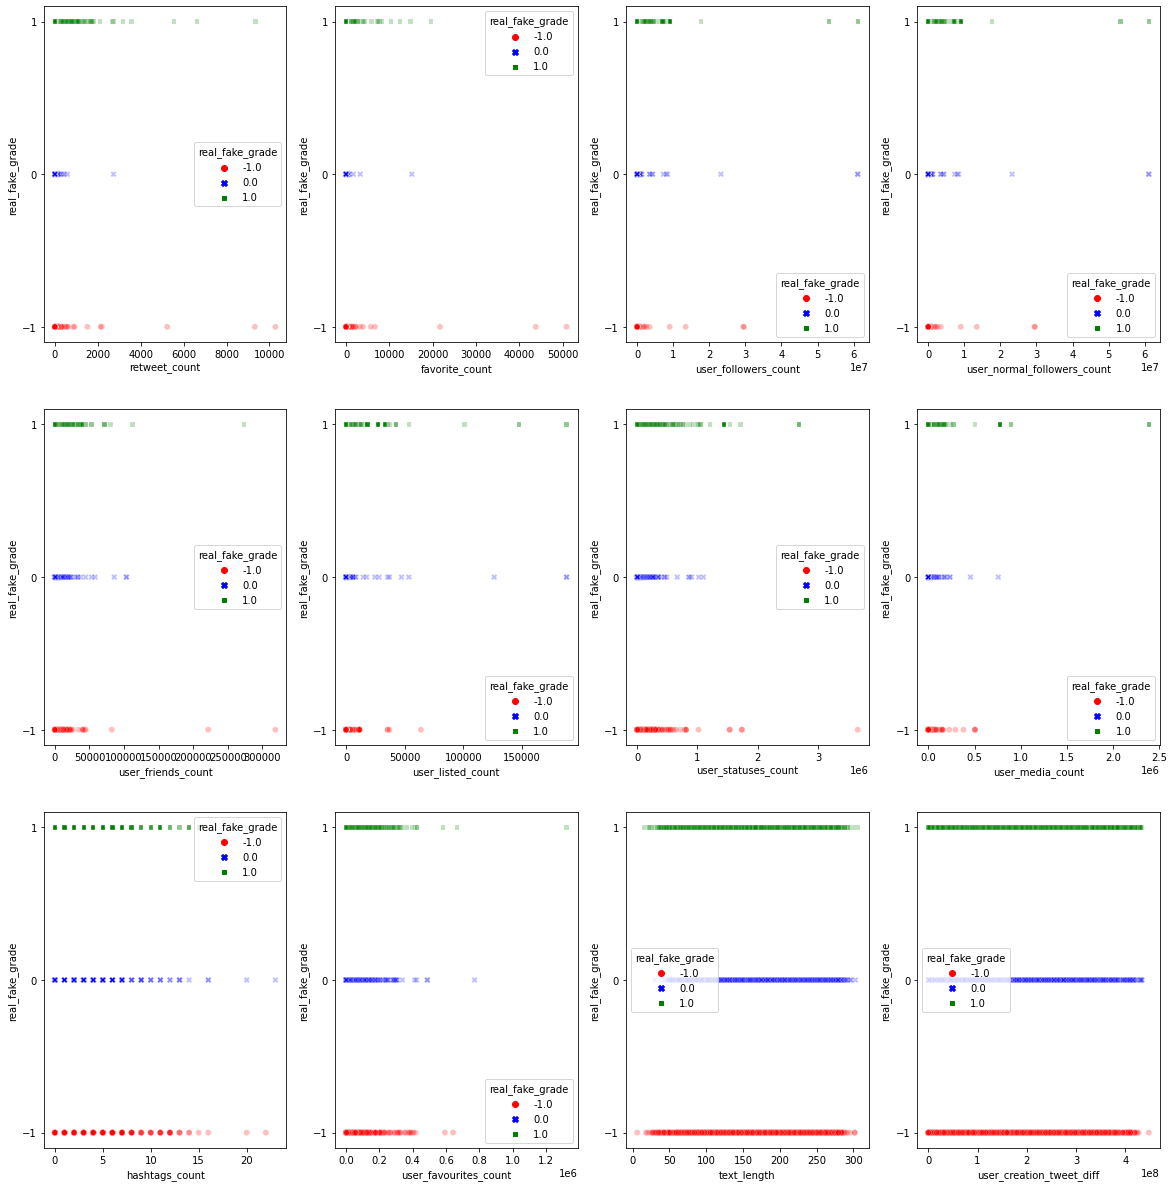

In [25]:
fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(20,7*rows))
axes = axes.flatten()

i = 0
for clm in data_columns:
  ax = axes[i]
  sns.scatterplot(data=data, x=clm, y='real_fake_grade', hue='real_fake_grade', ax=ax, style='real_fake_grade', palette=['red', 'blue', 'green'], alpha=.25)
  ax.set(yticks=np.arange(-1, 2, 1))
  ax.set_ylabel('real_fake_grade')
  ax.set_xlabel(clm)
  i+=1

plt.show()

- In de kolom text_length is geen structuur te vinden die mogelijk invloed heeft op de uitkomst van de kolom real_fake_grade;
- Bij de kolom hashtag_count valt niet heel veel op, bij de fake rows zijn een paar uitschieters te zien, maar dat kan toeval zijn

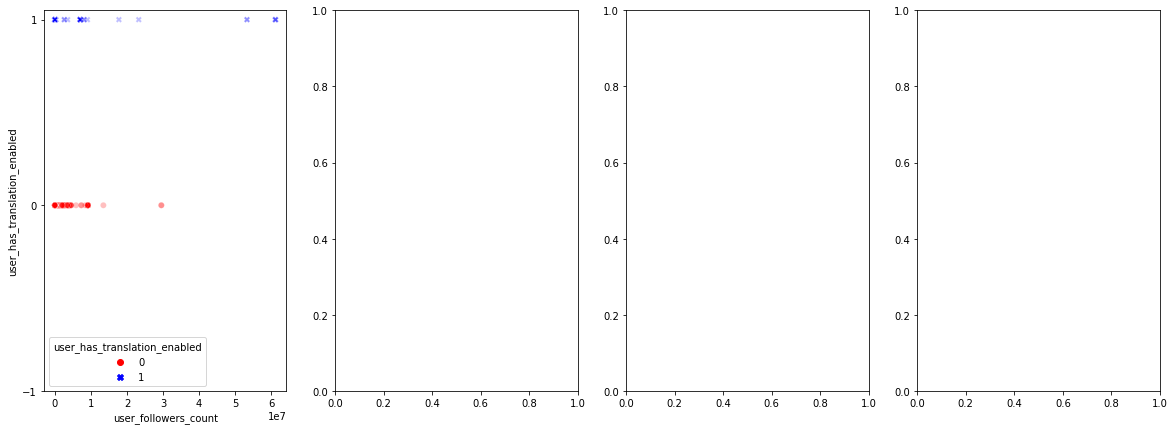

In [37]:
data_columns = ['user_followers_count']
columns = 4
rows = math.ceil(len(data_columns) / 4)

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(20,7*rows))
axes = axes.flatten()

i = 0
for clm in data_columns:
  ax = axes[i]
  sns.scatterplot(data=data, x=clm, y='user_has_translation_enabled', hue='user_has_translation_enabled', ax=ax, style='user_has_translation_enabled', palette=['red', 'blue'], alpha=.25)
  ax.set(yticks=np.arange(-1, 2, 1))
  ax.set_ylabel('user_has_translation_enabled')
  ax.set_xlabel(clm)
  i+=1

plt.show()